In [1]:
import multiprocessing as mp
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
def mundo_red_NWS(n_nodos, k, p, confinados = 0.3):

    G = nx.newman_watts_strogatz_graph(n_nodos, k, p, seed=None)
    numero_nodos_confinados = int(n_nodos * confinados)
    indices_nodo = list(range(0, G.number_of_nodes()))
    np.random.shuffle(indices_nodo)
    
    for ii in indices_nodo[0:numero_nodos_confinados]:
        G.remove_node(ii)
       
    for ii in list(G.nodes()):
        G.nodes[ii]["estado"] = 0 
    
    return G

def mundo_red_WS(n_nodos, k, p, confinados = 0.3):

    G = nx.connected_watts_strogatz_graph(n_nodos, k, p, tries=100)
    numero_nodos_confinados = int(n_nodos * confinados)
    indices_nodo = list(range(0, G.number_of_nodes()))
    np.random.shuffle(indices_nodo)
    
    for ii in indices_nodo[0:numero_nodos_confinados]:
        G.remove_node(ii)
       
    for ii in list(G.nodes()):
        G.nodes[ii]["estado"] = 0 
    
    return G

def mundo_red_BA(n_nodos, m, confinados = 0.3):
    
    G = nx.barabasi_albert_graph(n_nodos, m)
    numero_nodos_confinados = int(n_nodos * confinados)
    indices_nodo = list(range(0, G.number_of_nodes()))
    np.random.shuffle(indices_nodo)
    
    for ii in indices_nodo[0:numero_nodos_confinados]:
        G.remove_node(ii)
       
    for ii in list(G.nodes()):
        G.nodes[ii]["estado"] = 0 
    
    return G

def infeccion_inicial(G):
    
    if G.number_of_nodes() > 0:
    
        nodos_restantes = list(G.nodes())
        np.random.shuffle(nodos_restantes)
        paciente_cero = nodos_restantes[0]
        G.nodes[paciente_cero]["estado"] = 1

def propagacion_infeccion(G):
    
    if G.number_of_nodes() > 0:
    
        nuevos_infectados = []
    
        for ii in list(G.nodes()):
            if G.nodes[ii]["estado"] == 1:
                nuevos_infectados.append(ii)    
    
        while len(nuevos_infectados)>0:
            lista_auxiliar = []
            for nuevo_infectado in nuevos_infectados:
                for vecino in G.neighbors(nuevo_infectado):
                    if G.nodes[vecino]["estado"]==0:
                        G.nodes[vecino]["estado"]=1
                        lista_auxiliar.append(vecino)
            nuevos_infectados=lista_auxiliar

def porcentaje_infectados(G):
    
    if G.number_of_nodes() > 0:
    
        numero_infectados = 0
        for ii in list(G.nodes()):
            if G.nodes[ii]["estado"] == 1:
                numero_infectados += 1
            
        return numero_infectados/(G.number_of_nodes())
    else:
        return 0.0

def distribucion_grado(G):

    lista_grado = []

    for indice_nodo, grado_nodo in G.degree():
        lista_grado.append(grado_nodo)
    
    kmax=np.max(lista_grado)
    
    print('Kmax = {}'.format(kmax))
    print('Kmean = {}'.format(np.average(lista_grado)))
    
    frecuencia_grado = np.zeros(kmax+1)
    
    for ii in lista_grado:
        frecuencia_grado[ii] += 1

    x = np.linspace(0, kmax, num=kmax+1)

    y_sin_ceros = []
    x_sin_ceros = []

    for ii in range(len(frecuencia_grado)):
        if frecuencia_grado[ii]>0:
            y_sin_ceros.append(frecuencia_grado[ii])
            x_sin_ceros.append(x[ii])


    return x_sin_ceros, y_sin_ceros


# Newton Watson - Strogatz

Kmax = 16
Kmean = 8.4064


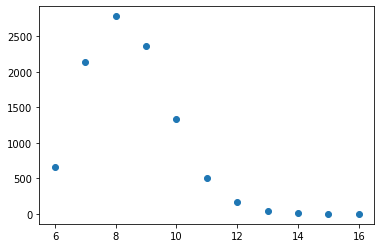

In [11]:
n_nodos = 10000
m = 6
p = 0.4
sistema = mundo_red_NWS(n_nodos, m, p, confinados=0)
hx,hy = distribucion_grado(sistema)
plt.scatter(hx, hy)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [39]:
def run(confinados):
    print(confinados)
    n_nodes=10000
    m=6
    p=0.4
    n_realizaciones=100
    lista_porcentaje_infectados = []
    for _ in range(n_realizaciones):
        sistema = mundo_red_NWS(n_nodes, m, p, confinados)
        infeccion_inicial(sistema)
        propagacion_infeccion(sistema)
        porcentaje = porcentaje_infectados(sistema)
        lista_porcentaje_infectados.append(porcentaje)
    return confinados, np.mean(lista_porcentaje_infectados)

In [40]:
confinados = np.linspace(0.0, 1.0, num=21)
pool = mp.Pool(4)
result = pool.map(run, confinados)
pool.close()
result=np.array(result)
argsort = np.argsort(result[:,0])
confinados=result[argsort,0]
infectados_promedio=result[argsort,1]

0.1
0.2
0.0
0.30000000000000004
0.35000000000000003
0.25
0.15000000000000002
0.05
0.4
0.5
0.6000000000000001
0.7000000000000001
0.45
0.55
0.65
0.75
0.8
0.9
1.0
0.8500000000000001
0.9500000000000001


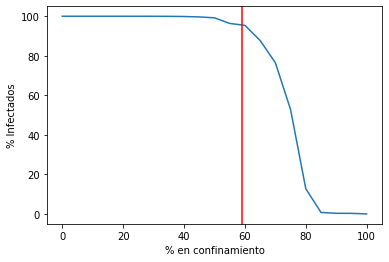

In [41]:
plt.plot(confinados*100,np.array(infectados_promedio)*100)
plt.axvline(x=59, ymin=0, ymax=1, color="red")
plt.ylabel("% Infectados")
plt.xlabel("% en confinamiento")
plt.show()

# Compact Watson - Strogatz

Kmax = 17
Kmean = 8.0


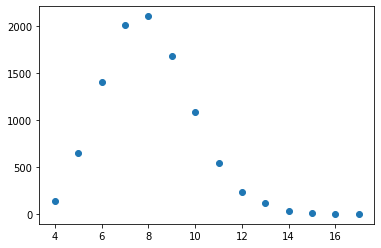

In [35]:
n_nodos = 10000
m = 8
p = 0.7
sistema = mundo_red_WS(n_nodos, m, p, confinados=0)
hx,hy = distribucion_grado(sistema)
plt.scatter(hx, hy)
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [42]:
def run(confinados):
    print(confinados)
    n_nodes=10000
    m=8
    p=0.7
    n_realizaciones=100
    lista_porcentaje_infectados = []
    for _ in range(n_realizaciones):
        sistema = mundo_red_WS(n_nodes, m, p, confinados)
        infeccion_inicial(sistema)
        propagacion_infeccion(sistema)
        porcentaje = porcentaje_infectados(sistema)
        lista_porcentaje_infectados.append(porcentaje)
    return confinados, np.mean(lista_porcentaje_infectados)

In [43]:
confinados = np.linspace(0.0, 1.0, num=21)
pool = mp.Pool(4)
result = pool.map(run, confinados)
pool.close()
result=np.array(result)
argsort = np.argsort(result[:,0])
confinados=result[argsort,0]
infectados_promedio=result[argsort,1]

0.0
0.1
0.2
0.30000000000000004
0.35000000000000003
0.25
0.15000000000000002
0.05
0.4
0.5
0.6000000000000001
0.7000000000000001
0.45
0.55
0.65
0.75
0.8
0.9
1.0
0.9500000000000001
0.8500000000000001


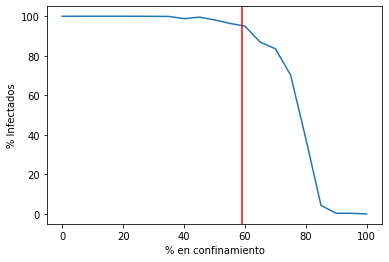

In [44]:
plt.plot(confinados*100,np.array(infectados_promedio)*100)
plt.axvline(x=59, ymin=0, ymax=1, color="red")
plt.ylabel("% Infectados")
plt.xlabel("% en confinamiento")
plt.show()

# Barabasi - Albert

Kmax = 418
Kmean = 3.9992


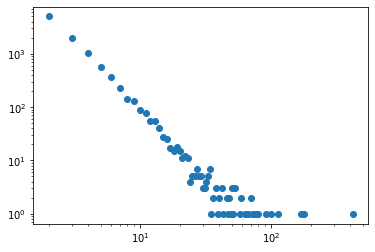

In [51]:
n_nodos = 10000
m = 4
sistema = mundo_red_BA(n_nodos, m, confinados=0)
hx,hy = distribucion_grado(sistema)
plt.scatter(hx, hy)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [52]:
def run(confinados):
    print(confinados)
    n_nodes=10000
    m=4
    n_realizaciones=100
    lista_porcentaje_infectados = []
    for _ in range(n_realizaciones):
        sistema = mundo_red_BA(n_nodes, m, confinados)
        infeccion_inicial(sistema)
        propagacion_infeccion(sistema)
        porcentaje = porcentaje_infectados(sistema)
        lista_porcentaje_infectados.append(porcentaje)
    return confinados, np.mean(lista_porcentaje_infectados)

In [53]:
confinados = np.linspace(0.0, 1.0, num=21)
pool = mp.Pool(4)
result = pool.map(run, confinados)
pool.close()
result=np.array(result)
argsort = np.argsort(result[:,0])
confinados=result[argsort,0]
infectados_promedio=result[argsort,1]

0.1
0.30000000000000004
0.0
0.2
0.35000000000000003
0.25
0.15000000000000002
0.05
0.4
0.5
0.6000000000000001
0.7000000000000001
0.45
0.55
0.65
0.75
0.8
0.9
1.0
0.9500000000000001
0.8500000000000001


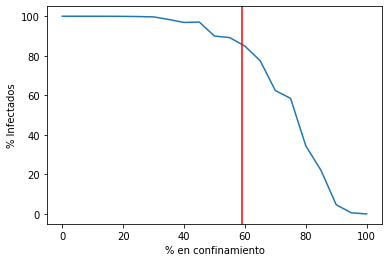

In [54]:
plt.plot(confinados*100,np.array(infectados_promedio)*100)
plt.axvline(x=59, ymin=0, ymax=1, color="red")
plt.ylabel("% Infectados")
plt.xlabel("% en confinamiento")
plt.show()